This whole Jupyter notebook is from Daniel Chen, "Introduction to Data Processing in Python with Pandas", from his talk at SciPy 2019.

In [92]:
import pandas as pd
import holoviews as hv


In [2]:
df = pd.read_csv('../data/gapminder.tsv', sep='\t')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
df.index

RangeIndex(start=0, stop=1704, step=1)

In [4]:
df.shape

(1704, 6)

In [5]:
df.values

array([['Afghanistan', 'Asia', 1952, 28.801, 8425333, 779.4453145],
       ['Afghanistan', 'Asia', 1957, 30.331999999999997, 9240934,
        820.8530296],
       ['Afghanistan', 'Asia', 1962, 31.997, 10267083, 853.1007099999999],
       ...,
       ['Zimbabwe', 'Africa', 1997, 46.809, 11404948, 792.4499602999999],
       ['Zimbabwe', 'Africa', 2002, 39.989000000000004, 11926563,
        672.0386227000001],
       ['Zimbabwe', 'Africa', 2007, 43.486999999999995, 12311143,
        469.70929810000007]], dtype=object)

In [6]:
pd.__version__

'1.0.1'

In [7]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [8]:
country = df['country']
type(country)

pandas.core.series.Series

We can also pull out a column and use it to make a new DataFrame...

In [9]:
country = df[['country']]

In [10]:
country.head()

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan


In [11]:
df_dropped = df.drop(['continent', 'country'], axis='columns')

How do we subset rows?

In [12]:
df.loc[0]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

loc[] can also be used with lists.

In [13]:
df.loc[[0, 1]] #Notice the double brackets.

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030


.loc works by doing a STRING match...so something like -1 will not return anything. It will give an error. It only returns indexed rows that match.

.iloc, conversely, actually works differently...

In [14]:
df.iloc[[0, 10, -1]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
10,Afghanistan,Asia,2002,42.129,25268405,726.734055
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


How do we subset rows AND columns?

Left of comma = subset or specify selection of rows

Right of comma = specify or select columns

In [15]:
subset = df.loc[:, ['year', 'pop']]

In [16]:
subset.head()

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460


In [17]:
subset = df.iloc[:, ['year', 'pop']]

IndexError: .iloc requires numeric indexers, got ['year' 'pop']

iloc() causes an error becaue it is trying to match for position (rather than .loc, which uses label).

In [18]:
subset = df.iloc[:, [2, 4]]
subset.head()

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460


In [19]:
#Throws an error because of use of ampersand...all comparisons or boolean statements must be wrapped in round brackets. Notice error.
df.loc[df['country'] == 'United States' & df['year'] == 1982]

TypeError: Cannot perform 'rand_' with a dtyped [int64] array and scalar of type [bool]

In [20]:
#This code works if we wrap each "unit" in brackets.
df.loc[(df['country'] == 'United States') & (df['year'] == 1982)]

,country,continent,year,lifeExp,pop,gdpPercap
1614,United States,Americas,1982,74.65,232187835,25009.55914


In [21]:
#How does global life expectancy change over the years? Must use groupby as part of split-apply-combine.
df.groupby(['year'])['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [22]:
import numpy as np
#Agg() can be fed any function...it takes many values and returns a single value back
df.groupby(['year'])['lifeExp'].agg(np.mean) #Notice no double parentheses at end of this statement.

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [23]:
df.groupby(['year', 'continent']) [['lifeExp', 'gdpPercap']].agg(np.mean)

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

In [24]:
#The output above is a hierarchical index....we can "reset the index" to flatten our Dataset back.
df.groupby(['year', "continent"]) [['lifeExp', 'gdpPercap']].agg(np.mean).reset_index()

,year,continent,lifeExp,gdpPercap
0,1952,Africa,39.135500,1252.572466
1,1952,Americas,53.279840,4079.062552
2,1952,Asia,46.314394,5195.484004
3,1952,Europe,64.408500,5661.057435
4,1952,Oceania,69.255000,10298.085650
5,1957,Africa,41.266346,1385.236062
6,1957,Americas,55.960280,4616.043733
7,1957,Asia,49.318544,5787.732940
8,1957,Europe,66.703067,6963.012816
9,1957,Oceania,70.295000,11598.522455


In [25]:
pew = pd.read_csv('../data/pew.csv')
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


This is not tidy...what we should have is three columns, called "Religion", "Income" and "Count"...

To fix this issue, we can use a function called "melt", which essentially slims down and concatenates the columns.

In [26]:
pew.melt(id_vars='religion')
#id_vars are columns we "do not want to touch...". We want to pivot down the OTHER columns and not touch religion.
#Anything not specified in id_vars is automatically put into value_vars

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [27]:
#Now let's explore other parameters within the melt function...
pew_tidy = pew.melt(id_vars='religion', var_name='income', value_name='count')
pew_tidy.head()

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


Now let's work with a more complicated example from the BillBoard dataset.

In [28]:
billboard = pd.read_csv('../data/billboard.csv')
billboard.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is SUPER untidy! There are a bunch of weeks, between 1 and 71. We could not say, for example, "Given the week, what is the average ranking across time for all songs?" and other questions.

Given the week, what is the average ranking across time for all songs, etc?

We want to keep the first five columns, and then melt the rest.

In [29]:
# To keep multiple columns, we can put id_vars into a list, square brackets.
billboard.melt(id_vars=['year', 'artist', 'track', 'time', 'date.entered'],
              value_name = 'rank', var_name='week')

,year,artist,track,time,date.entered,week,rank
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [30]:
#How can we do "piping" on this? Pipes are a sequence of multiple operations that save space, etc.
(billboard
  .melt(id_vars=['year', 'artist', 'track', 'time', 'date.entered'],
        value_name = 'rank', 
        var_name='week')
 .groupby('artist')['rank']
 .mean()
) #Just wrap it in parentheses () and then do a dot - chain!

artist
2 Pac               85.428571
2Ge+her             90.000000
3 Doors Down        37.602740
504 Boyz            56.222222
98^0                37.650000
                      ...    
Yankee Grey         83.125000
Yearwood, Trisha    84.166667
Ying Yang Twins     88.857143
Zombie Nation       99.000000
matchbox twenty     18.641026
Name: rank, Length: 228, dtype: float64

Now how do we clean data when multiple variables are stored in a SINGLE column?

In [31]:
ebola = pd.read_csv('../data/country_timeseries.csv')
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


For example, the Cases_Guinea column actually contains TWO variables: how many cases there were (2776) AND what country the cases occurred in (Guinea).

It would be better for our index column to be country names, and then have a column for date, day, cases, deaths.

In [32]:
ebola_long = ebola.melt(id_vars = ['Date', 'Day'],
                       var_name = 'cd_country',
                       value_name = 'count'
                       )

In [33]:
ebola_long.head()

,Date,Day,cd_country,count
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


This is almost tidy, but now we need to split the cd_country column into CASES and DEATHS (two separate columns). We can do this by finding the "underscore" and splitting

In [36]:
'hello_world'.split('_') #Example of using built-in split() function to split something at a specified location in a string.

['hello', 'world']

In [39]:
ebola_long['cd_country'].str.split('_')
#Pandas has a special accessor, .str, which has all built-in string methods from Python, but works on a column.
#Pandas also has one called .dt for date-time and .cat for categorical columns. See https://pandas.pydata.org/docs/reference/series.html for more information.

0       [Cases, Guinea]
1       [Cases, Guinea]
2       [Cases, Guinea]
3       [Cases, Guinea]
4       [Cases, Guinea]
             ...       
1947     [Deaths, Mali]
1948     [Deaths, Mali]
1949     [Deaths, Mali]
1950     [Deaths, Mali]
1951     [Deaths, Mali]
Name: cd_country, Length: 1952, dtype: object

We want to take the first one and assign to a column called Case-Death and take the second part of the string and assign to a column called Country.

In [43]:
ebola_split = ebola_long['cd_country'].str.split('_', expand=True) #expand gives a dataframe on the split string.

In [44]:
ebola_long[['status', 'country']] = ebola_split

In [45]:
ebola_long.head()

,Date,Day,cd_country,count,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


In [49]:
ebola_long.drop('cd_country', axis=1)

,Date,Day,count,status,country
0,1/5/2015,289,2776.0,Cases,Guinea
1,1/4/2015,288,2775.0,Cases,Guinea
2,1/3/2015,287,2769.0,Cases,Guinea
3,1/2/2015,286,NaN,Cases,Guinea
4,12/31/2014,284,2730.0,Cases,Guinea
...,...,...,...,...,...
1947,3/27/2014,5,NaN,Deaths,Mali
1948,3/26/2014,4,NaN,Deaths,Mali
1949,3/25/2014,3,NaN,Deaths,Mali
1950,3/24/2014,2,NaN,Deaths,Mali


Everything thus far has been to make long datasets...but how do we pivot DataFrames back to the original form?

In [53]:
weather = pd.read_csv('../data/weather.csv')
weather.head()
#In this dataset, data is stored in both rows AND columns!

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notice that a low of rows have repeated values...variables here are stored in both rows and columns...

In [61]:
weather_long = weather.melt(id_vars = ['id', 'year', 'month', 'element'],
             var_name='day',
             value_name='temp',
        )
weather_long

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,d31,NaN
678,MX17004,2010,11,tmax,d31,NaN
679,MX17004,2010,11,tmin,d31,NaN
680,MX17004,2010,12,tmax,d31,NaN


Pandas Pivot does the opposite of method. See pandas.DataFrame.pivot() and pandas.pivot_table

pivot_table is quite powerful, because it has aggfunc (which takes mean of values if there are duplicates in a column) that can be set to numpy.min, etc. 

In [59]:
weather_long.pivot_table(index=['id', 'year', 'month', 'day'],
                        columns='element',
                        values='temp'
                        )

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4
             3     d10  34.5  16.8
                   d16  31.1  17.6
                   d5   32.1  14.2
             4     d27  36.3  16.7
             5     d27  33.2  18.2
             6     d17  28.0  17.5
                   d29  30.1  18.0
             7     d3   28.6  17.5
                   d14  29.9  16.5
             8     d23  26.4  15.0
                   d5   29.6  15.8
                   d29  28.0  15.3
                   d13  29.8  16.5
                   d25  29.7  15.6
                   d31  25.4  15.4
                   d8   29.0  17.3
             10    d5   27.0  14.0
                   d14  29.5  13.0
                   d15  28.7  10.5
                   d28  31.2  15.0
                   d7   28.1  12.9
             11    d2   31.3  16.3
                   d5   26.3   7.9
                   d27  27.7  14.2
                   d26  28.1  12.1
                   d4   27.2  12.0
             12    d1   29.9  13.8
                   d6   27.8  10.5

In [60]:
weather_long.pivot_table(index=['id', 'year', 'month', 'day'],
                        columns='element',
                        values='temp'
                        ).reset_index()

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4
5,MX17004,2010,3,d10,34.5,16.8
6,MX17004,2010,3,d16,31.1,17.6
7,MX17004,2010,3,d5,32.1,14.2
8,MX17004,2010,4,d27,36.3,16.7
9,MX17004,2010,5,d27,33.2,18.2


In [76]:
tbl1 = pd.read_csv('../data/table1.csv')

In [85]:
tbl2 = pd.read_csv('../data/table2.csv')

In [86]:
tbl3 = pd.read_csv('../data/table3.csv')

**Table 1** is already clean!

In [87]:
tbl1.head()

,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272


**Tidy the table 2 dataset!**

In [88]:
tbl2.head() #Notice that 'type' column contains two types of information. We want to split this up.
#We can do this using pivot_table()

,country,year,type,count
0,Afghanistan,1999,cases,745
1,Afghanistan,1999,population,19987071
2,Afghanistan,2000,cases,2666
3,Afghanistan,2000,population,20595360
4,Brazil,1999,cases,37737


In [89]:
tbl2_pivot = tbl2.pivot_table(index=['country', 'year'],
                 columns='type',
                 values='count',
                 ).reset_index()

In [90]:
tbl2_pivot.head()

type,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272


**Table3** just return the population from the rate column. Use string spltiting.

In [68]:
tbl3.head()

,country,year,rate
0,Afghanistan,1999,745/19987071
1,Afghanistan,2000,2666/20595360
2,Brazil,1999,37737/172006362
3,Brazil,2000,80488/174504898
4,China,1999,212258/1272915272


In [94]:
tbl3_split = tbl3['rate'].str.split('/', expand=True)
tbl3_split

,0,1
0,745,19987071
1,2666,20595360
2,37737,172006362
3,80488,174504898
4,212258,1272915272
5,213766,1280428583


In [97]:
tbl3['population'] = tbl3_split[1]

In [100]:
tbl3.drop('rate', axis=1)

,country,year,population
0,Afghanistan,1999,19987071
1,Afghanistan,2000,20595360
2,Brazil,1999,172006362
3,Brazil,2000,174504898
4,China,1999,1272915272
5,China,2000,1280428583


**Now we move on to writing functions to execute in a DataFrame!!! Probably using lambda functions.

In [101]:
# for example...
df = pd.DataFrame({
    'a': [10, 20, 30],
    'b': [20, 30, 40]
})

In [102]:
df

,a,b
0,10,20
1,20,30
2,30,40


In [103]:
df['a']

0    10
1    20
2    30
Name: a, dtype: int64

In [105]:
df['a'] ** 2 #operation happens for every row...this is called "broadcasting"

0    100
1    400
2    900
Name: a, dtype: int64

In [110]:
def my_sq(value):
    return value ** 2

In [111]:
df['a'].apply(my_sq) #Note that df['a'] is a series, not a DataFrame...only one axis here.

0    100
1    400
2    900
Name: a, dtype: int64

In [112]:
def my_exp(x, e):
    #x is a number, and e is an exponent
    return x ** e

In [113]:
my_exp(2, 10)

1024

In [114]:
df['a'].apply(my_exp, e=4)

0     10000
1    160000
2    810000
Name: a, dtype: int64

In [115]:
def print_me(x):
    print(x)

In [116]:
df.apply(print_me)

0    10
1    20
2    30
Name: a, dtype: int64
0    20
1    30
2    40
Name: b, dtype: int64


a    None
b    None
dtype: object

In [117]:
def avg_3(x, y, z):
    return (x + y + z) / 3

In [118]:
df.apply(avg_3) #missing two required arguments, y and z!

TypeError: avg_3() missing 2 required positional arguments: 'y' and 'z'

In [119]:
df.apply(avg_3, y=df['b'], z=2)

,a,b
0,10.666667,14.000000
1,17.333333,20.666667
2,24.000000,27.333333


In [120]:
import numpy as np

In [121]:
def avg_3(col):
    return np.mean(col)

In [122]:
df.apply(avg_3)

a    20.0
b    30.0
dtype: float64

In [123]:
def avg_3_apply(col):
    x = col[0]
    y = col[1]
    z = col[2]
    return (x + y + z) / 3

In [126]:
df.apply(avg_3_apply, axis='columns') #error is thrown because we don't have a z...only two columns, so index out of bounds.

IndexError: index out of bounds

In [127]:
def avg_2_mod(x, y):
    if (x == 20):
        return np.NaN
    else:
        return(x + y) / 2

In [131]:
df #We want to use each row, a and b, as x and y.

,a,b
0,10,20
1,20,30
2,30,40


numpy has a way to vectorize data for us.

In [133]:
avg_2_mod_vec = np.vectorize(avg_2_mod)

In [136]:
avg_2_mod_vec(df['a'], df['b']) #Now it knows to handle each row element by element...

array([15., nan, 35.])

In [141]:
@np.vectorize #Wow, vectorize can be used as a decorator!!
def avg_2_mod(x, y):
    if (x == 20):
        return np.NaN
    else:
        return(x + y) / 2

In [140]:
avg_2_mod(df['a'], df['b'])

array([15., nan, 35.])

In [142]:
import numba

In [143]:
@numba.vectorize #Wow, vectorize can be used as a decorator!!
def avg_2_mod_numba(x, y):
    if (x == 20):
        return np.NaN
    else:
        return(x + y) / 2

In [144]:
#numba takes calculations dealing with numpy, and tries to make them as fast as possible.

In [145]:
avg_2_mod_numba(df['a'], df['b']) #will throw error, doesn't know what a Series is...only numpy.

ValueError: [1mcannot determine Numba type of <class 'pandas.core.series.Series'>[0m

In [147]:
avg_2_mod_numba(df['a'].values, df['b'].values)

array([15., nan, 35.])

In [149]:
%%timeit
avg_2_mod(df['a'], df['b'])

The slowest run took 4.11 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 48.8 µs per loop


In [150]:
%%timeit
avg_2_mod_numba(df['a'].values, df['b'].values)

The slowest run took 10.09 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 4.51 µs per loop


In [153]:
#Let's write a function now that takes population out of the 'rate' column in tbl3 and automatically makes new column with population
def extract_population(rate):
    pop = rate.split('/')[1]
    return int(pop)

In [158]:
pops = tbl3['rate'].apply(extract_population)
tbl3['pop'] = pops
tbl3

,country,year,rate,population,pop
0,Afghanistan,1999,745/19987071,19987071,19987071
1,Afghanistan,2000,2666/20595360,20595360,20595360
2,Brazil,1999,37737/172006362,172006362,172006362
3,Brazil,2000,80488/174504898,174504898,174504898
4,China,1999,212258/1272915272,1272915272,1272915272
5,China,2000,213766/1280428583,1280428583,1280428583


In [159]:
import seaborn as sns

In [161]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [162]:
import matplotlib.pyplot as plt

How do we make a quick plot with our tips dataset? For a given column, we can plot! It is a built-in method for a series.

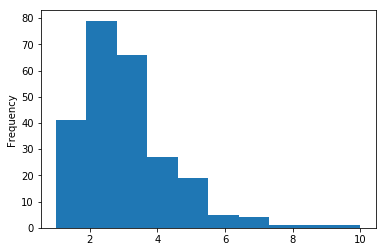

In [164]:
tips.tip.plot(kind='hist')

In [167]:
cts = tips.smoker.value_counts()
cts

No     151
Yes     93
Name: smoker, dtype: int64

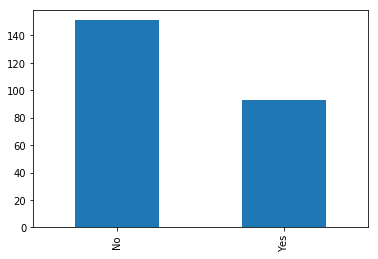

In [168]:
#Now we can make a bar plot with this.
cts.plot(kind='bar')

Now let's look at seaborn.

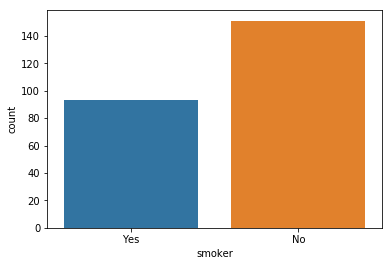

In [170]:
sns.countplot(x='smoker', data=tips)

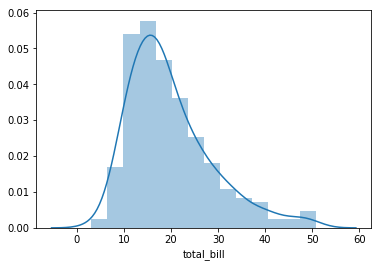

In [171]:
sns.distplot(tips.total_bill)

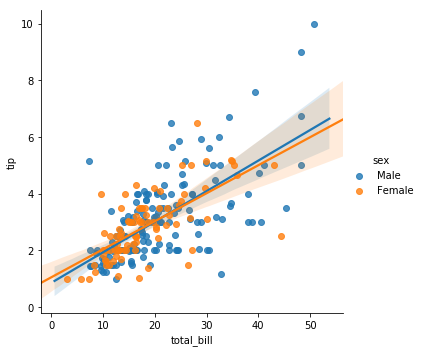

In [173]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex') #line graphs, lm specifies a linear regression.

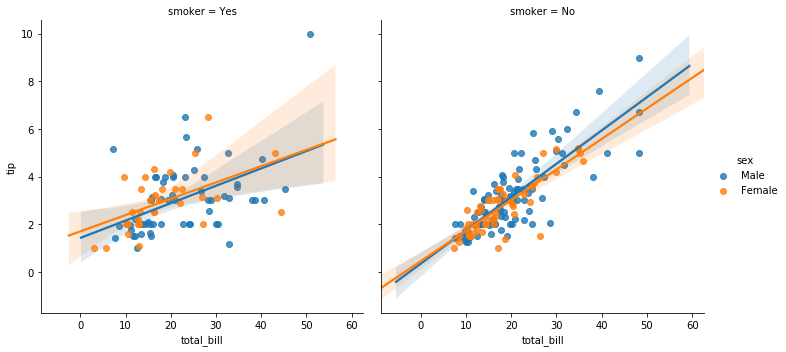

In [174]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', col='smoker')

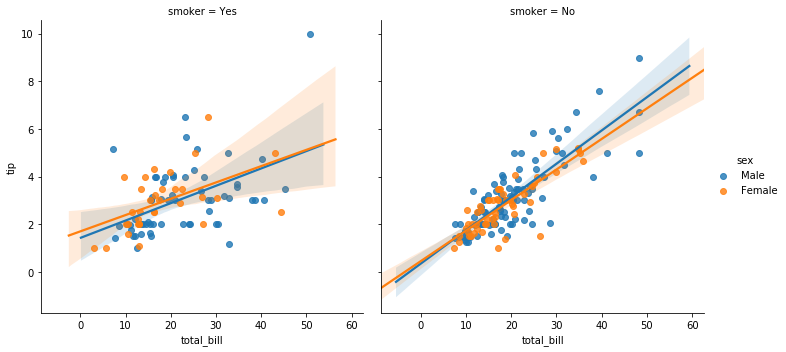

In [177]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', col='smoker')

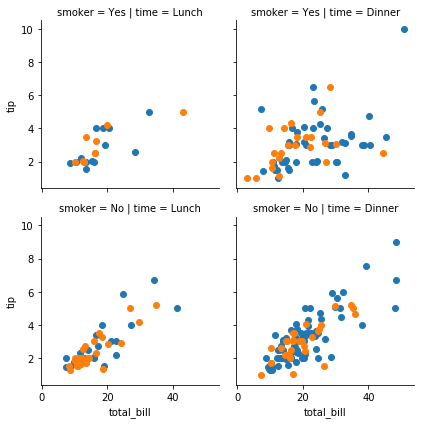

In [178]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex') #set up canvas
facet.map(plt.scatter, 'total_bill', 'tip') #think of .map() as similar to .apply() -- this is adding our glyphs to the graph.

In [182]:
%load_ext watermark

%watermark -v -p numpy,matplotlib,seaborn,pandas,jupyterlab

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.7.5
IPython 5.8.0

numpy 1.18.1
matplotlib 3.0.3
seaborn 0.9.0
pandas 1.0.1
jupyterlab 1.2.4
